In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas_profiling 
from numpy import argmax
import itertools
%matplotlib inline
sns.set(color_codes=True)

# setting up plot style 
#style.use('seaborn-poster')
#style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import statsmodels.formula.api as SM
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import fbeta_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# PART TWO - BANKING AND FINANCE

## 1. Import and warehouse data:

### Import all the given datasets and explore shape and size of each.

In [110]:
df_D1 = pd.read_csv('Part2 - Data1.csv')
df_D2 = pd.read_csv('Part2 -Data2.csv')

In [111]:
df_D1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  MonthlyAverageSpend  Level
0   1   25              1            49    91107            4                  1.6      1
1   2   45             19            34    90089            3                  1.5      1
2   3   39             15            11    94720            1                  1.0      1
3   4   35              9           100    94112            1                  2.7      2
4   5   35              8            45    91330            4                  1.0      2

In [112]:
df_D1.shape

(5000, 8)

In [113]:
df_D2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0   1         0         1                    0                0           0         NaN
1   2         0         1                    0                0           0         NaN
2   3         0         0                    0                0           0         NaN
3   4         0         0                    0                0           0         NaN
4   5         0         0                    0                0           1         NaN

In [114]:
df_D2.shape

(5000, 7)

### Merge all datasets onto one and explore final shape and size.

In [115]:
df_M = pd.merge(df_D1, df_D2, how='inner')
df_M

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0        1   25              1            49    91107            4                  1.6      1         0         1                    0                0           0         NaN
1        2   45             19            34    90089            3                  1.5      1         0         1                    0                0           0         NaN
2        3   39             15            11    94720            1                  1.0      1         0         0                    0                0           0         NaN
3        4   35              9           100    94112            1                  2.7      2         0         0                    0                0           0         NaN
4        5   35              8            45    91330            4                  1.0      2         0         0                    0                0           1         NaN
...    ...  ...            ...           ...      ...          ...                  ...    ...       ...       ...                  ...              ...         ...         ...
4995  4996   29              3            40    92697            1                  1.9      3         0         0                    0                1           0         0.0
4996  4997   30              4            15    92037            4                  0.4      1        85         0                    0                1           0         0.0
4997  4998   63             39            24    93023            2                  0.3      3         0         0                    0                0           0         0.0
4998  4999   65             40            49    90034            3                  0.5      2         0         0                    0                1           0         0.0
4999  5000   28              4            83    92612            3                  0.8      1         0         0                    0                1           1         0.0

[5000 rows x 14 columns]

In [116]:
df_M.shape

(5000, 14)

In [117]:
df_M.size

70000

## 2. Data Cleansing:

### Explore and if required correct the datatypes of each attribute

In [118]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [119]:
df_M=df_M.drop('ZipCode',axis=1) #Zipcode and ID is a useless column not required for the business reasoning so droping it
df_M=df_M.drop('ID',axis=1)
df_M

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0      25              1            49            4                  1.6      1         0         1                    0                0           0         NaN
1      45             19            34            3                  1.5      1         0         1                    0                0           0         NaN
2      39             15            11            1                  1.0      1         0         0                    0                0           0         NaN
3      35              9           100            1                  2.7      2         0         0                    0                0           0         NaN
4      35              8            45            4                  1.0      2         0         0                    0                0           1         NaN
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...         ...
4995   29              3            40            1                  1.9      3         0         0                    0                1           0         0.0
4996   30              4            15            4                  0.4      1        85         0                    0                1           0         0.0
4997   63             39            24            2                  0.3      3         0         0                    0                0           0         0.0
4998   65             40            49            3                  0.5      2         0         0                    0                1           0         0.0
4999   28              4            83            3                  0.8      1         0         0                    0                1           1         0.0

[5000 rows x 12 columns]

In [120]:
df_M.shape

(5000, 12)

In [121]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   int64  
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   int64  
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   int64  
 8   FixedDepositAccount  5000 non-null   int64  
 9   InternetBanking      5000 non-null   int64  
 10  CreditCard           5000 non-null   int64  
 11  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 507.8 KB


### Explore for null values in the attributes and if required drop or impute values.

In [122]:
df_M.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [123]:
df_M['LoanOnCard'].mode() #calculating mode for column LoanOnCard

0    0.0
dtype: float64

In [124]:
df_M['LoanOnCard'] = df_M['LoanOnCard'].fillna(0) #imputing mode value to null values in column LoanOnCard
df_M

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0      25              1            49            4                  1.6      1         0         1                    0                0           0         0.0
1      45             19            34            3                  1.5      1         0         1                    0                0           0         0.0
2      39             15            11            1                  1.0      1         0         0                    0                0           0         0.0
3      35              9           100            1                  2.7      2         0         0                    0                0           0         0.0
4      35              8            45            4                  1.0      2         0         0                    0                0           1         0.0
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...         ...
4995   29              3            40            1                  1.9      3         0         0                    0                1           0         0.0
4996   30              4            15            4                  0.4      1        85         0                    0                1           0         0.0
4997   63             39            24            2                  0.3      3         0         0                    0                0           0         0.0
4998   65             40            49            3                  0.5      2         0         0                    0                1           0         0.0
4999   28              4            83            3                  0.8      1         0         0                    0                1           1         0.0

[5000 rows x 12 columns]

In [125]:
df_M[df_M['Age']<0]  # check for negaive values in Age column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [126]:
df_M[df_M['CustomerSince']<0] # check for negaive values in CustomerSince column

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
89     25             -1           113            4                 2.30      3         0         0                    0                0           1         0.0
226    24             -1            39            2                 1.70      2         0         0                    0                0           0         0.0
315    24             -2            51            3                 0.30      3         0         0                    0                1           0         0.0
451    28             -2            48            2                 1.75      3        89         0                    0                1           0         0.0
524    24             -1            75            4                 0.20      1         0         0                    0                1           0         0.0
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...         ...
4411   23             -2            75            2                 1.80      2         0         0                    0                1           1         0.0
4481   25             -2            35            4                 1.00      3         0         0                    0                1           0         0.0
4514   24             -3            41            4                 1.00      3         0         0                    0                1           0         0.0
4582   25             -1            69            3                 0.30      3         0         0                    0                1           0         0.0
4957   29             -1            50            2                 1.75      3         0         0                    0                0           1         0.0

[52 rows x 12 columns]

In [127]:
df_M[df_M['HighestSpend']<0] # check for negaive values in HighestSpend column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [128]:
df_M[df_M['HiddenScore']<0] # check for negaive values in HiddenScore column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [129]:
df_M[df_M['MonthlyAverageSpend']<0] # check for negaive values in MonthlyAverageSpend column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [130]:
df_M[df_M['Level']<0] # check for negaive values in Level column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [131]:
df_M[df_M['Mortgage']<0] # check for negaive values in Mortgage column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [132]:
df_M[df_M['Security']<0] # check for negaive values in Security column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [133]:
df_M[df_M['FixedDepositAccount']<0] # check for negaive values in FixedDepositAccount column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [134]:
df_M[df_M['InternetBanking']<0] # check for negaive values in InternetBanking column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [135]:
df_M[df_M['CreditCard']<0] # check for negaive values in CreditCard column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [136]:
df_M[df_M['LoanOnCard']<0] # check for negaive values in LoanOnCard column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

In [137]:
df_M['CreditCard'].value_counts(normalize=True) 

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [138]:
df_M['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [139]:
# return the absolute value of the negative values
def PositiveChange(x):
    if x<0:
        x=np.abs(x)
    return x

In [140]:
df_M['CustomerSince']=df_M['CustomerSince'].apply(PositiveChange) # send the values of the CustomerSince column to the function PositiveChange

In [141]:
df_M[df_M['CustomerSince']<0] # all negative values are removed from the CustomerSince column

Empty DataFrame
Columns: [Age, CustomerSince, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []


### Explore and if required correct the datatypes of each attribute

In [142]:
df_M['LoanOnCard']=df_M['LoanOnCard'].astype(np.int64) # correct data type of LoanOnCard to int from float

In [143]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   int64  
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   int64  
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   int64  
 8   FixedDepositAccount  5000 non-null   int64  
 9   InternetBanking      5000 non-null   int64  
 10  CreditCard           5000 non-null   int64  
 11  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


In [144]:
df_M.head(11)

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0    25              1            49            4                  1.6      1         0         1                    0                0           0           0
1    45             19            34            3                  1.5      1         0         1                    0                0           0           0
2    39             15            11            1                  1.0      1         0         0                    0                0           0           0
3    35              9           100            1                  2.7      2         0         0                    0                0           0           0
4    35              8            45            4                  1.0      2         0         0                    0                0           1           0
5    37             13            29            4                  0.4      2       155         0                    0                1           0           0
6    53             27            72            2                  1.5      2         0         0                    0                1           0           0
7    50             24            22            1                  0.3      3         0         0                    0                0           1           0
8    35             10            81            3                  0.6      2       104         0                    0                1           0           0
9    34              9           180            1                  8.9      3         0         0                    0                0           0           1
10   65             39           105            4                  2.4      3         0         0                    0                0           0           0

In [145]:
df_M

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0      25              1            49            4                  1.6      1         0         1                    0                0           0           0
1      45             19            34            3                  1.5      1         0         1                    0                0           0           0
2      39             15            11            1                  1.0      1         0         0                    0                0           0           0
3      35              9           100            1                  2.7      2         0         0                    0                0           0           0
4      35              8            45            4                  1.0      2         0         0                    0                0           1           0
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...         ...
4995   29              3            40            1                  1.9      3         0         0                    0                1           0           0
4996   30              4            15            4                  0.4      1        85         0                    0                1           0           0
4997   63             39            24            2                  0.3      3         0         0                    0                0           0           0
4998   65             40            49            3                  0.5      2         0         0                    0                1           0           0
4999   28              4            83            3                  0.8      1         0         0                    0                1           1           0

[5000 rows x 12 columns]

## 3. Data analysis & visualisation

### Perform detailed statistical analysis on the data.

In [40]:
df_M.describe()

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend        Level     Mortgage     Security  FixedDepositAccount  InternetBanking   CreditCard   LoanOnCard
count  5000.000000    5000.000000   5000.000000  5000.000000          5000.000000  5000.000000  5000.000000  5000.000000           5000.00000      5000.000000  5000.000000  5000.000000
mean     45.338400      20.134600     73.774200     2.396400             1.937938     1.881000    56.498800     0.104400              0.06040         0.596800     0.294000     0.096000
std      11.463166      11.415189     46.033729     1.147663             1.747659     0.839869   101.713802     0.305809              0.23825         0.490589     0.455637     0.294621
min      23.000000       0.000000      8.000000     1.000000             0.000000     1.000000     0.000000     0.000000              0.00000         0.000000     0.000000     0.000000
25%      35.000000      10.000000     39.000000     1.000000             0.700000     1.000000     0.000000     0.000000              0.00000         0.000000     0.000000     0.000000
50%      45.000000      20.000000     64.000000     2.000000             1.500000     2.000000     0.000000     0.000000              0.00000         1.000000     0.000000     0.000000
75%      55.000000      30.000000     98.000000     3.000000             2.500000     3.000000   101.000000     0.000000              0.00000         1.000000     1.000000     0.000000
max      67.000000      43.000000    224.000000     4.000000            10.000000     3.000000   635.000000     1.000000              1.00000         1.000000     1.000000     1.000000

### Outlier Check

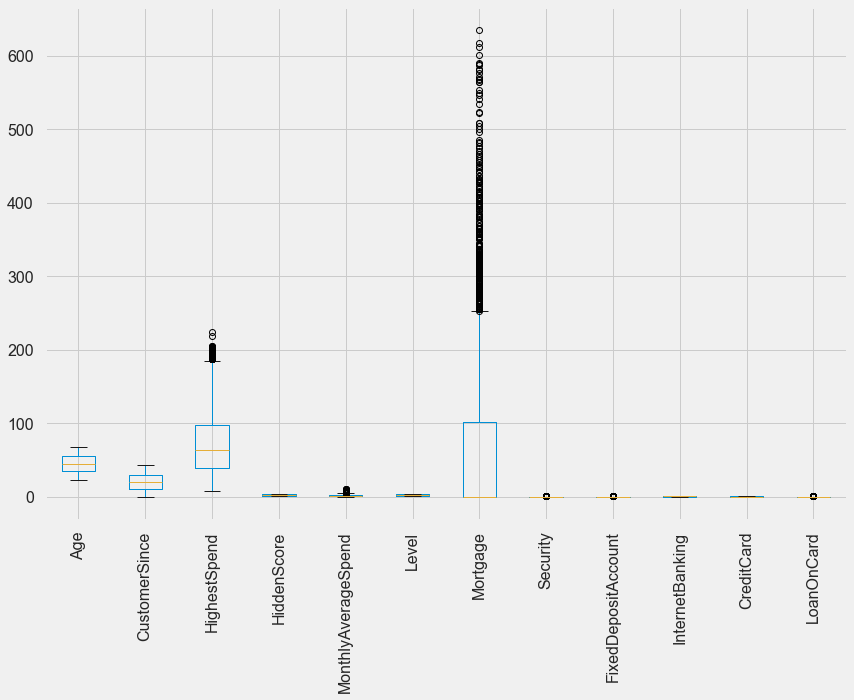

<Figure size 1080x720 with 0 Axes>

In [41]:
style.use('seaborn-poster')
style.use('fivethirtyeight')
g = df_M.boxplot()
g.set_xticklabels(rotation=90,labels=df_M.columns)
figure=plt.figure(figsize=(15,10))
#plt.xticks(rotation =45,fontsize =20)

#### From the above box plots we see that Mortgage and HighestSpend have the maximum outliers.

### Distribution of the numerical cols

In [42]:
df_M.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'], dtype='object')

In [43]:
df_num_M = df_M[['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage']]

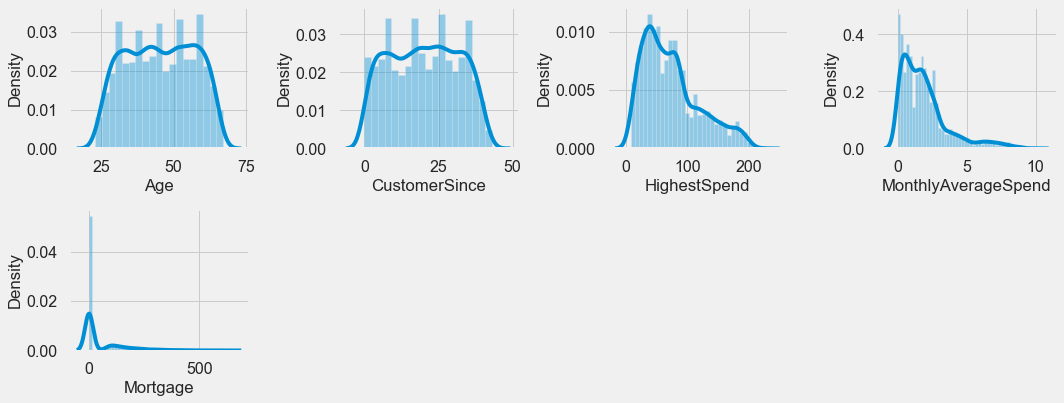

In [44]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_num_M.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.distplot(df_num_M[df_num_M.columns[i]])
    plt.tight_layout()

#### From the Distribuition plots above we see that none of the columns are evenly distribuited.

### Classification of Categorical columns

In [45]:
df_M.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'], dtype='object')

In [46]:
df_cat_M = df_M[['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']]

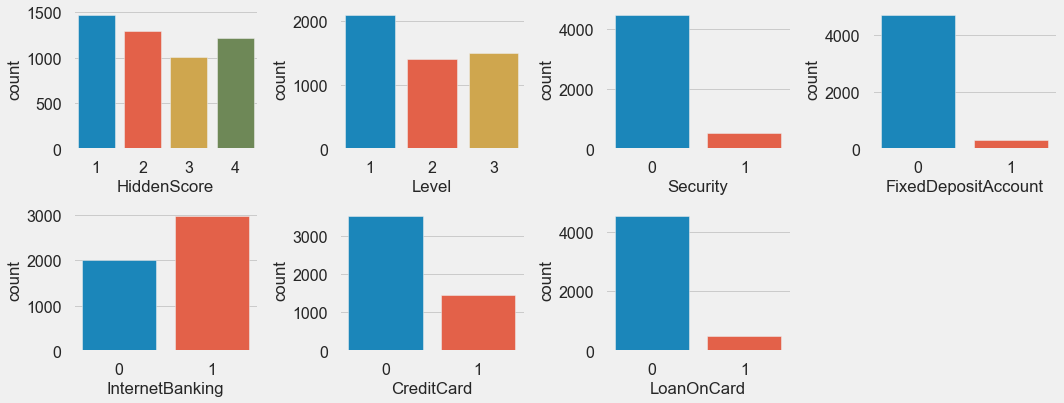

In [47]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_cat_M.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.countplot(df_cat_M[df_cat_M.columns[i]])
    plt.tight_layout()

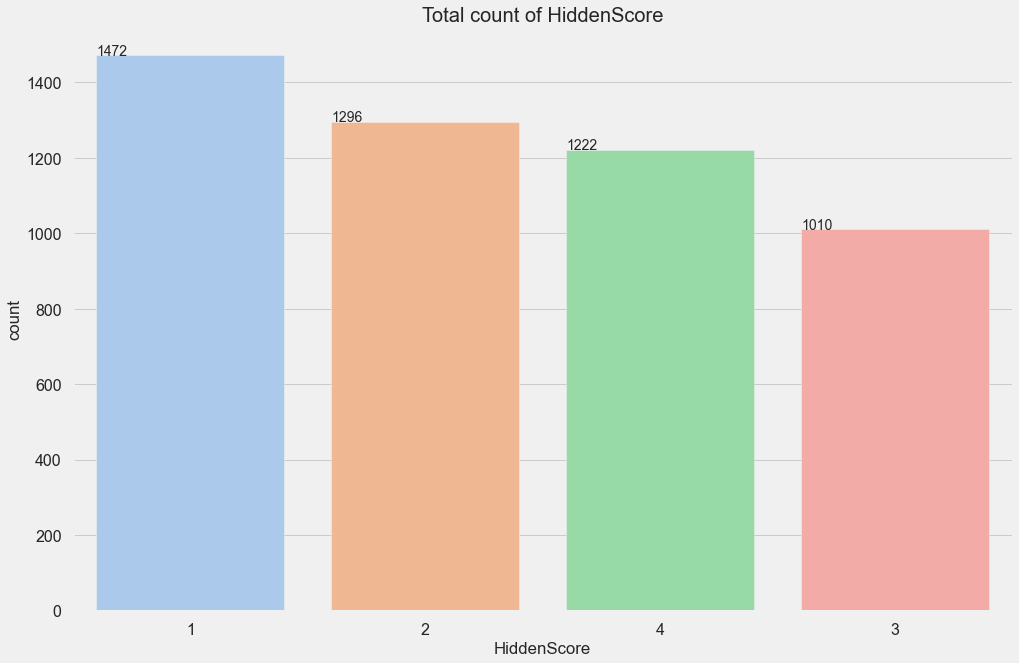

In [48]:
# Count of HiddenScore.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="HiddenScore", data=df_cat_M, 
                   order = df_cat_M['HiddenScore'].value_counts().index)
plt.title('Total count of HiddenScore')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Hidden Score of 1 has the highest count of 1472 customers and that of 3 has the lowest 1010 customers

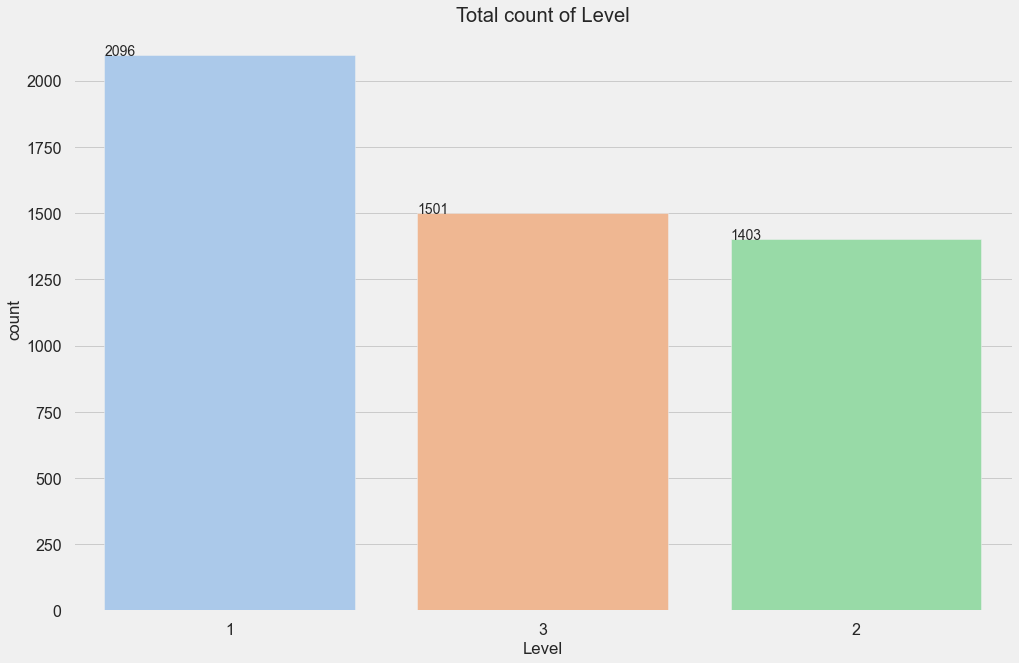

In [49]:
# Count of Level.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Level", data=df_cat_M, 
                   order = df_cat_M['Level'].value_counts().index)
plt.title('Total count of Level')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Level 1 has the highest count 2096 customers and that of 2 has the lowest 1403 customers

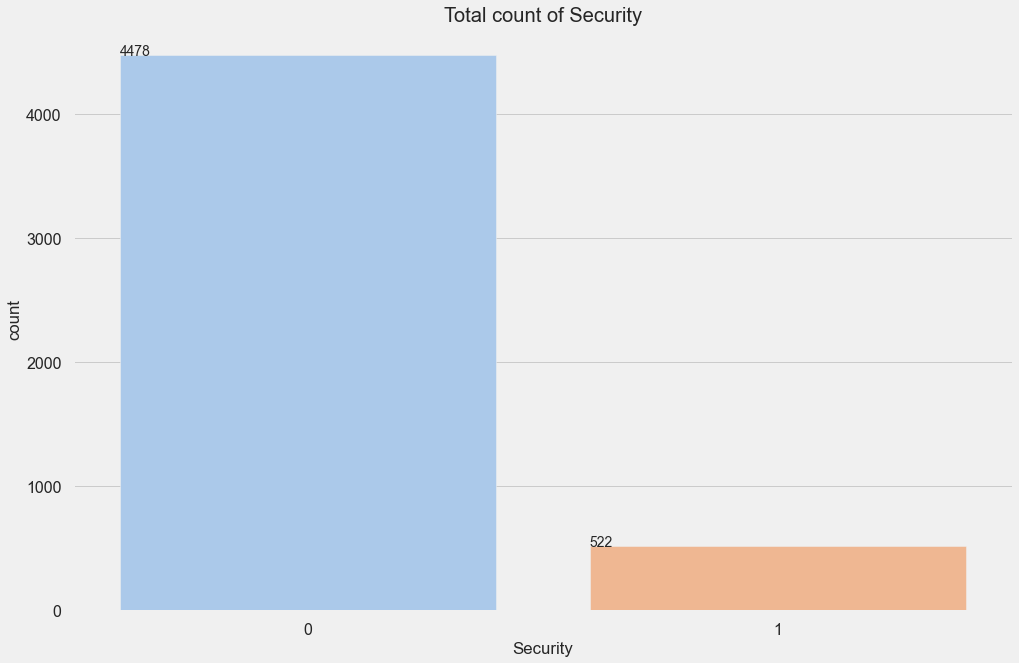

In [50]:
# Count of Security.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Security", data=df_cat_M, 
                   order = df_cat_M['Security'].value_counts().index)
plt.title('Total count of Security')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Security is available to 522 customers.

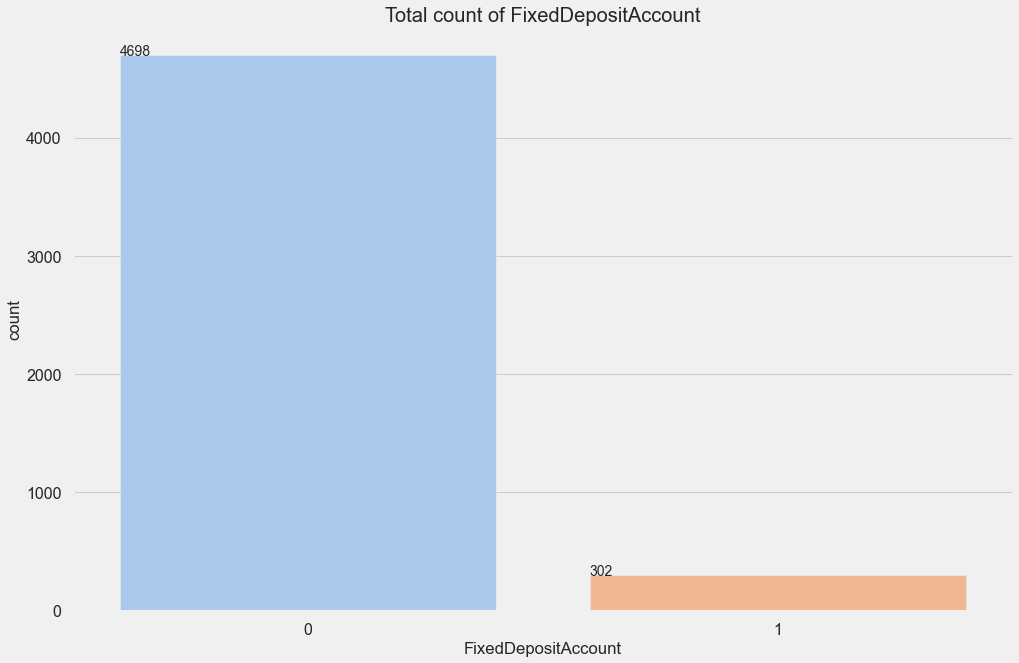

In [51]:
# Count of FixedDepositAccount.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="FixedDepositAccount", data=df_cat_M, 
                   order = df_cat_M['FixedDepositAccount'].value_counts().index)
plt.title('Total count of FixedDepositAccount')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Fixed Deposit Account is with 302 customers.

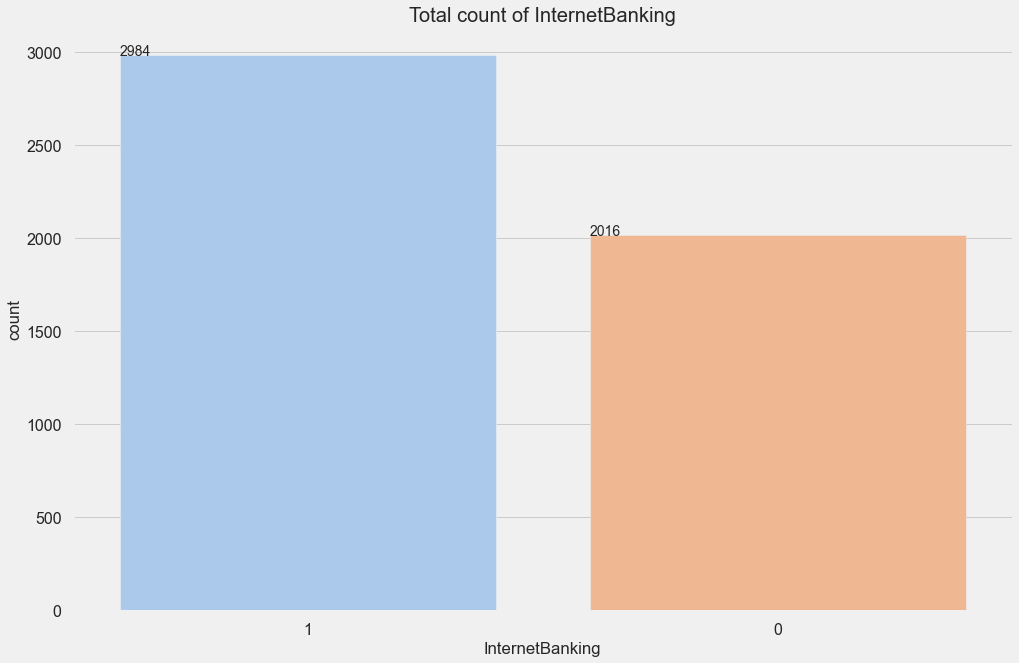

In [52]:
#### From the above count plot we see that Security is available to less people 522 and is not available to 4476.# Count of InternetBanking.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="InternetBanking", data=df_cat_M, 
                   order = df_cat_M['InternetBanking'].value_counts().index)
plt.title('Total count of InternetBanking')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Internet Banking is been used by 2984 customers.

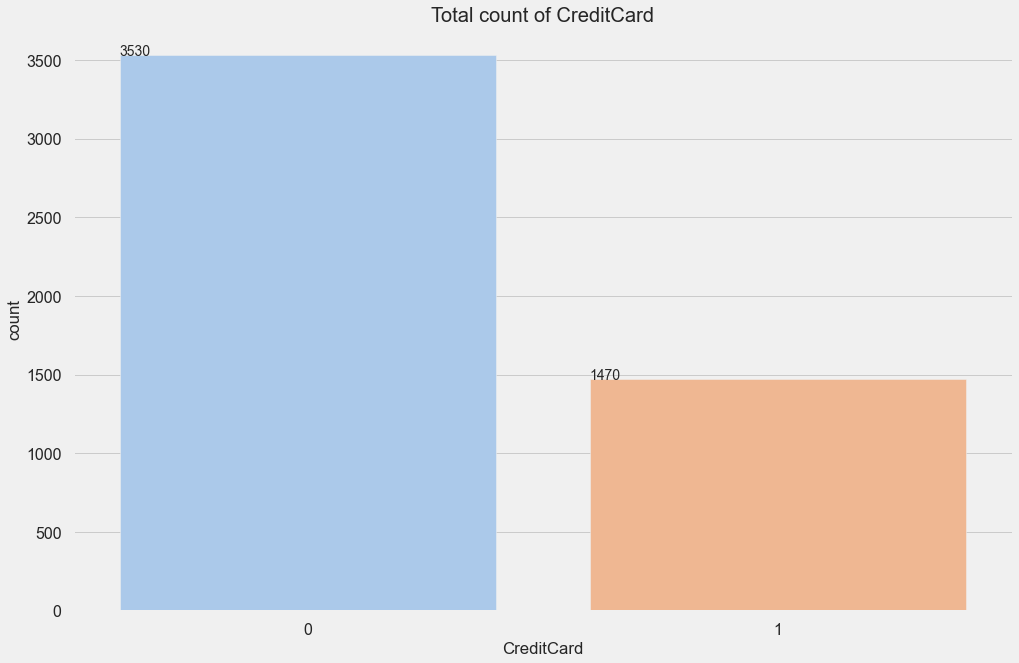

In [53]:
# Count of CreditCard.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="CreditCard", data=df_cat_M, 
                   order = df_cat_M['CreditCard'].value_counts().index)
plt.title('Total count of CreditCard')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Credit Card is been used by 1470 customers.

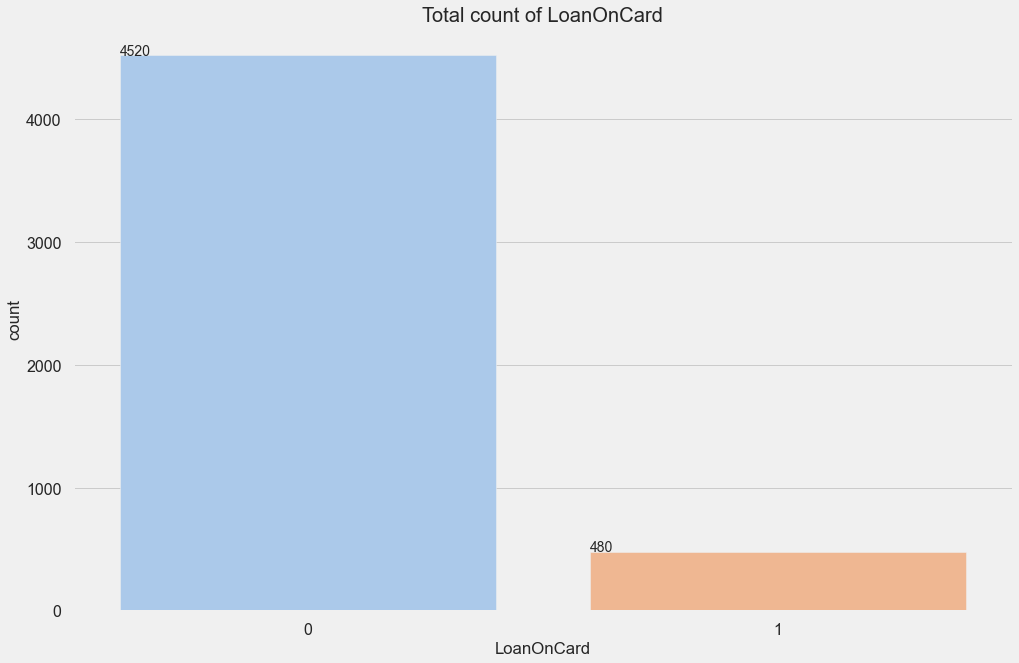

In [54]:
# Count of LoanOnCard.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="LoanOnCard", data=df_cat_M, 
                   order = df_cat_M['LoanOnCard'].value_counts().index)
plt.title('Total count of LoanOnCard')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that Loan On Card is been used for 480 customers.

In [57]:
df_num_M['LoanOnCard']=df_M['LoanOnCard']

In [60]:
df_num_M.head()

Age  CustomerSince  HighestSpend  MonthlyAverageSpend  Mortgage  LoanOnCard
0   25              1            49                  1.6         0           0
1   45             19            34                  1.5         0           0
2   39             15            11                  1.0         0           0
3   35              9           100                  2.7         0           0
4   35              8            45                  1.0         0           0

### Pair Plot for classification based on Loan On Card

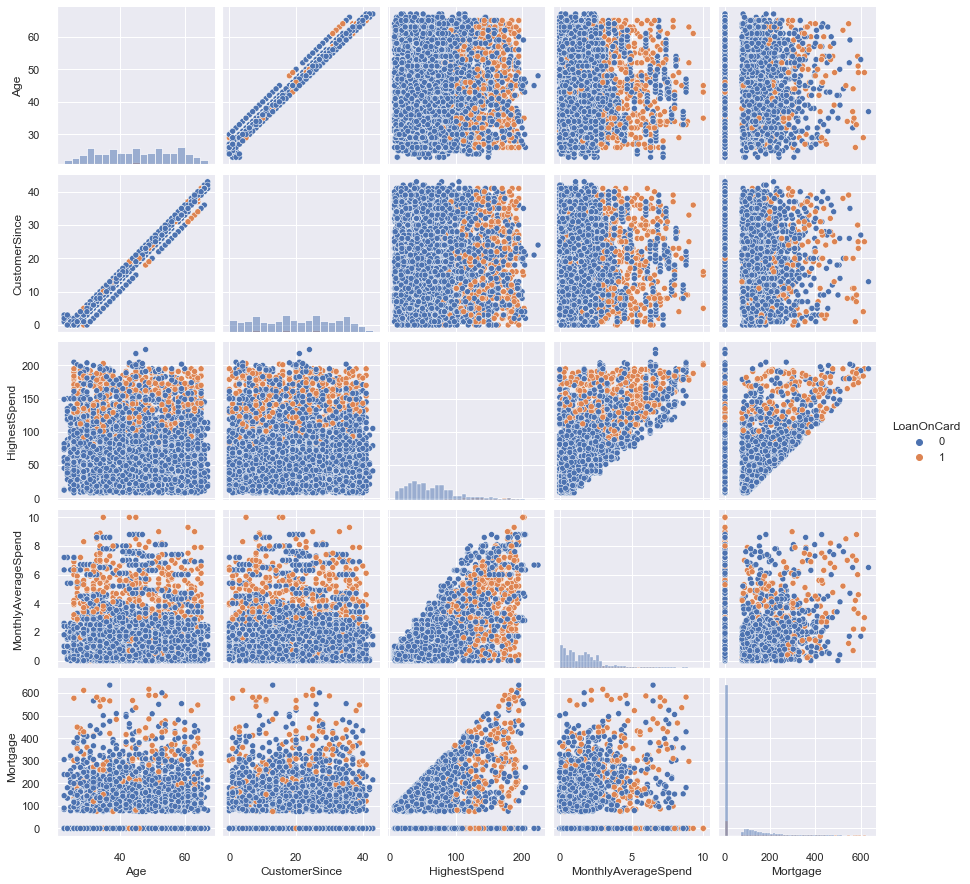

In [66]:
# Pair Plot
sns.pairplot(df_num_M,diag_kind='hist',hue='LoanOnCard')

#### From the pair plot we see that there is strong linearity between CustomerSince and Age

### Bar Plot for classification based on Loan on Card

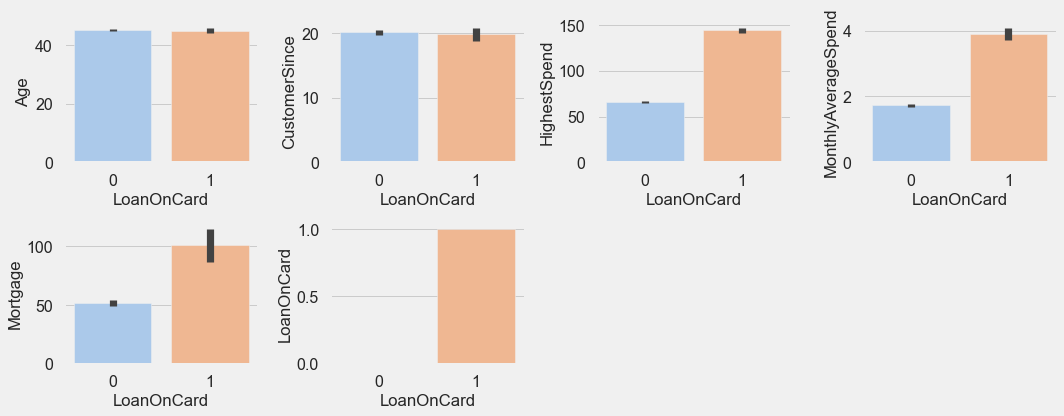

In [63]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_num_M.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.barplot(df_num_M['LoanOnCard'], df_num_M[df_num_M.columns[i]])
    plt.tight_layout()

#### From the bar plots we see that we have Age and CustomerSince has highest classification with LoanOnCard 

In [67]:
df_num_M.drop('LoanOnCard', axis= 1, inplace= True)

### Checking correlation

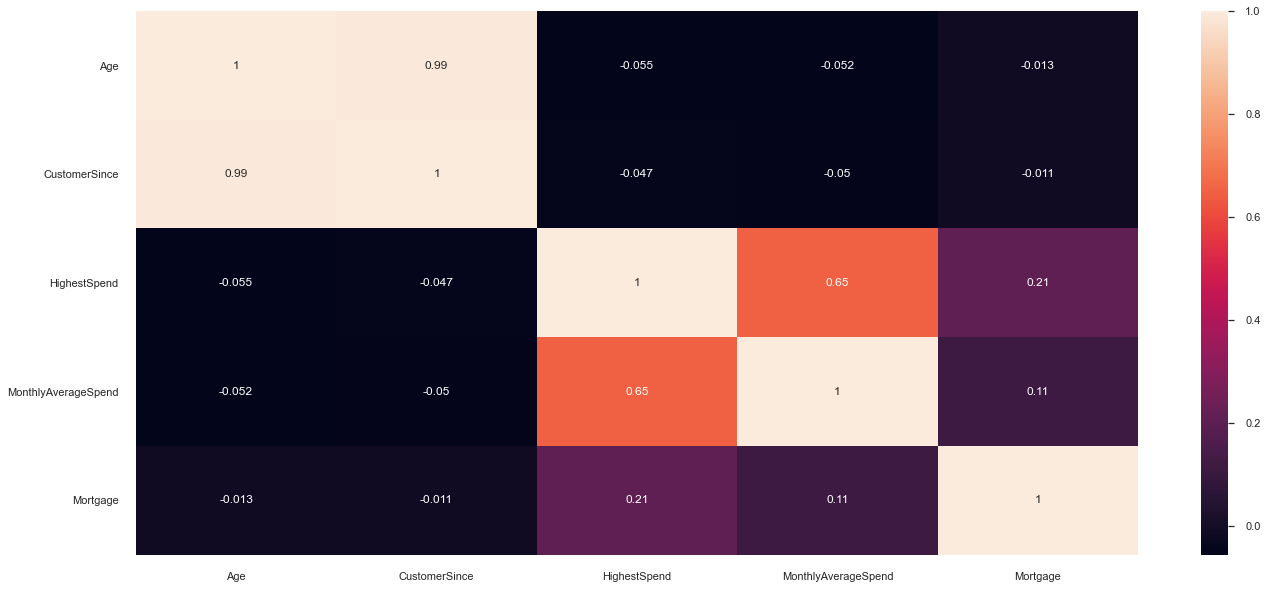

In [68]:
plt.figure(figsize= (20,10))
sns.heatmap(df_num_M.corr(), annot= True)
plt.show()

#### From the above heat map we see that Customer Since and Age are highly correlated.

### Pandas Profiling

In [38]:
pandas_profiling.ProfileReport(df_M)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
pandas_profiling.ProfileReport(df_M).to_file(output_file='BankingAndFinance.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Data pre-processing:
### Segregate predictors vs target attributes

In [41]:
df_M.head()

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0   25              1            49            4                  1.6      1         0         1                    0                0           0           0
1   45             19            34            3                  1.5      1         0         1                    0                0           0           0
2   39             15            11            1                  1.0      1         0         0                    0                0           0           0
3   35              9           100            1                  2.7      2         0         0                    0                0           0           0
4   35              8            45            4                  1.0      2         0         0                    0                0           1           0

In [42]:
from sklearn.model_selection import train_test_split
# Transform data into features and target
X = df_M.drop('LoanOnCard', axis=1)
Y = df_M['LoanOnCard']

In [43]:
X

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard
0      25              1            49            4                  1.6      1         0         1                    0                0           0
1      45             19            34            3                  1.5      1         0         1                    0                0           0
2      39             15            11            1                  1.0      1         0         0                    0                0           0
3      35              9           100            1                  2.7      2         0         0                    0                0           0
4      35              8            45            4                  1.0      2         0         0                    0                0           1
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...
4995   29              3            40            1                  1.9      3         0         0                    0                1           0
4996   30              4            15            4                  0.4      1        85         0                    0                1           0
4997   63             39            24            2                  0.3      3         0         0                    0                0           0
4998   65             40            49            3                  0.5      2         0         0                    0                1           0
4999   28              4            83            3                  0.8      1         0         0                    0                1           1

[5000 rows x 11 columns]

In [44]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: LoanOnCard, Length: 5000, dtype: int64

###  Check for target balancing.

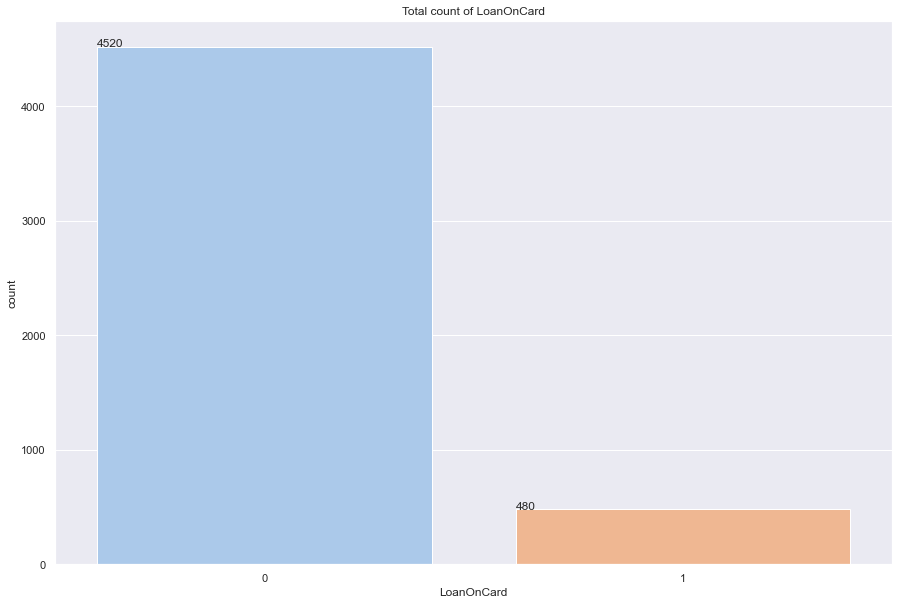

In [45]:
# Count of Class.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="LoanOnCard", data=df_M, 
                   order = df_M['LoanOnCard'].value_counts().index)
plt.title('Total count of LoanOnCard')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### We see that 480 customers have Loan On Card

### Applying SMOTE to balance the two classes.

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
oversample = SMOTE()
X1,Y1 = oversample.fit_resample(X, Y)

In [48]:
X1

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard
0      25              1            49            4             1.600000      1         0         1                    0                0           0
1      45             19            34            3             1.500000      1         0         1                    0                0           0
2      39             15            11            1             1.000000      1         0         0                    0                0           0
3      35              9           100            1             2.700000      2         0         0                    0                0           0
4      35              8            45            4             1.000000      2         0         0                    0                0           1
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...
9035   30              4           171            2             2.018939      2         0         0                    0                0           0
9036   40             13           177            1             3.385882      3       159         0                    0                0           0
9037   61             35           152            1             2.692599      2         0         0                    0                0           0
9038   31              7           132            1             1.768208      3         0         0                    0                0           0
9039   56             30           131            2             0.614261      1         0         0                    0                0           0

[9040 rows x 11 columns]

In [49]:
Y1

0       0
1       0
2       0
3       0
4       0
       ..
9035    1
9036    1
9037    1
9038    1
9039    1
Name: LoanOnCard, Length: 9040, dtype: int64

In [50]:
Y1.value_counts()

0    4520
1    4520
Name: LoanOnCard, dtype: int64

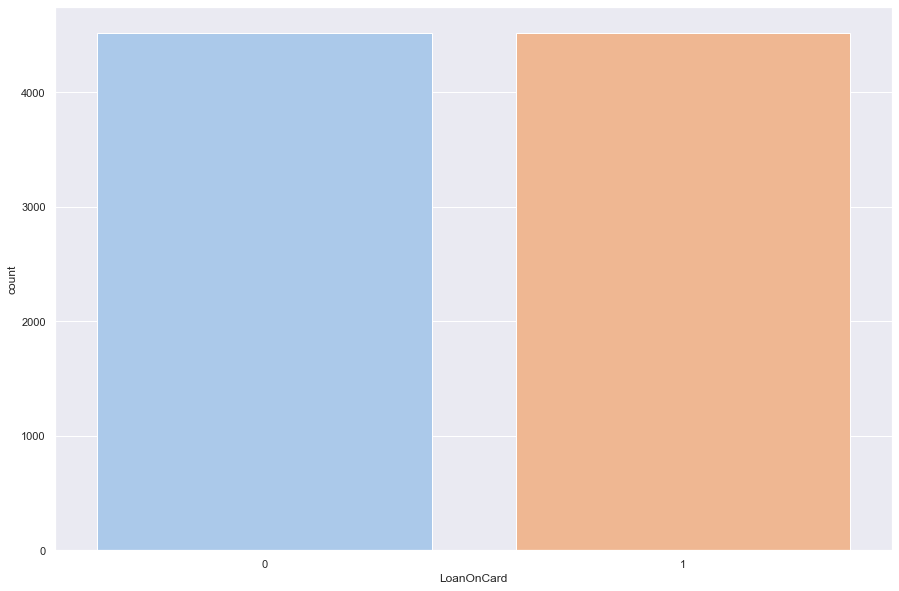

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(Y1)
plt.show()

### Perform train-test split.

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, 
                                                    test_size = 0.30, random_state = 42,stratify = Y1)

In [53]:
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('Y_train ', Y_train.shape)
print('Y_test ', Y_test.shape)

X_train  (6328, 11)
X_test  (2712, 11)
Y_train  (6328,)
Y_test  (2712,)


In [54]:
print(Y1.mean(), Y_train.mean(), Y_test.mean())

0.5 0.5 0.5


In [55]:
X_train

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard
3369   34             10            84            4             0.100000      2         0         0                    0                1           0
6306   35              9           171            3             1.107370      2       295         0                    0                1           0
1117   42             18           145            1             1.700000      1       132         0                    0                1           1
2569   35             10           139            1             4.600000      1         0         0                    0                0           0
3987   62             36            19            2             0.200000      3         0         0                    0                1           1
...   ...            ...           ...          ...                  ...    ...       ...       ...                  ...              ...         ...
1297   61             35            90            4             1.900000      2         0         0                    0                1           0
2641   29              5           133            1             5.400000      1       212         0                    0                1           0
5863   54             29           129            3             3.347096      2         0         0                    0                0           0
5524   41             16           167            1             7.656477      2         0         0                    0                0           0
7628   56             30           119            3             2.456730      2       319         0                    0                0           0

[6328 rows x 11 columns]

## 5. Model training, testing and tuning:

### Logistic regression

In [84]:
# import logistic regression and train on tarining set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [85]:
# Predict range of test data
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
Y_pred_train
Y_pred_test

array([0, 1, 1, ..., 1, 1, 1])

### Accuracy of our Logistic Regression on Test Data

In [86]:
# Let's measure the accuracy of this model's prediction on test data
accuracy_score(Y_test, Y_pred_test)

0.8860619469026548

### Accuracy of our Logistic Regression on Train Data

In [87]:
# Let's measure the accuracy of this model's prediction on training data
accuracy_score(Y_train, Y_pred_train)

0.884007585335019

### Confusion Matrix for Logistic Regression on TRAIN data.

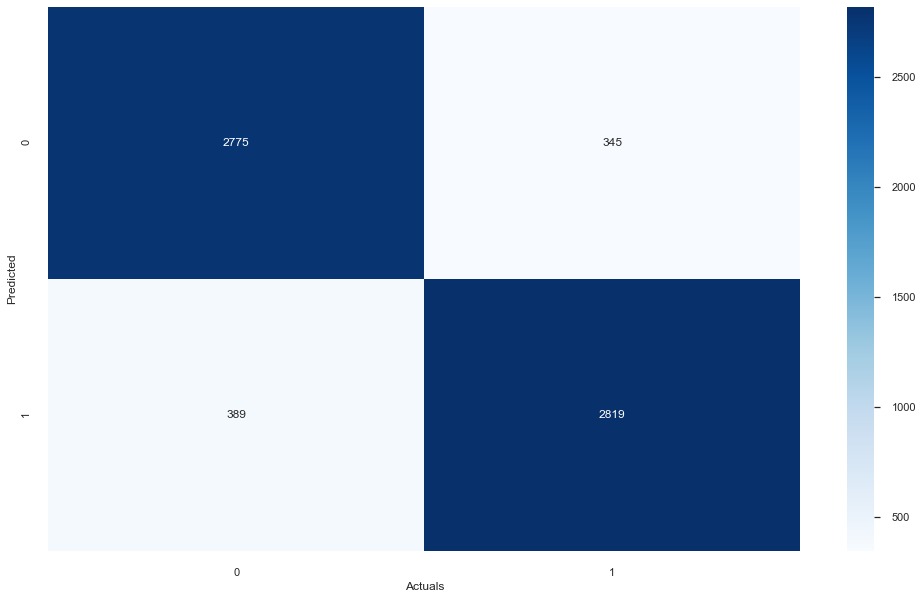

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Confusion Matrix for Logistic Regression on TEST data.

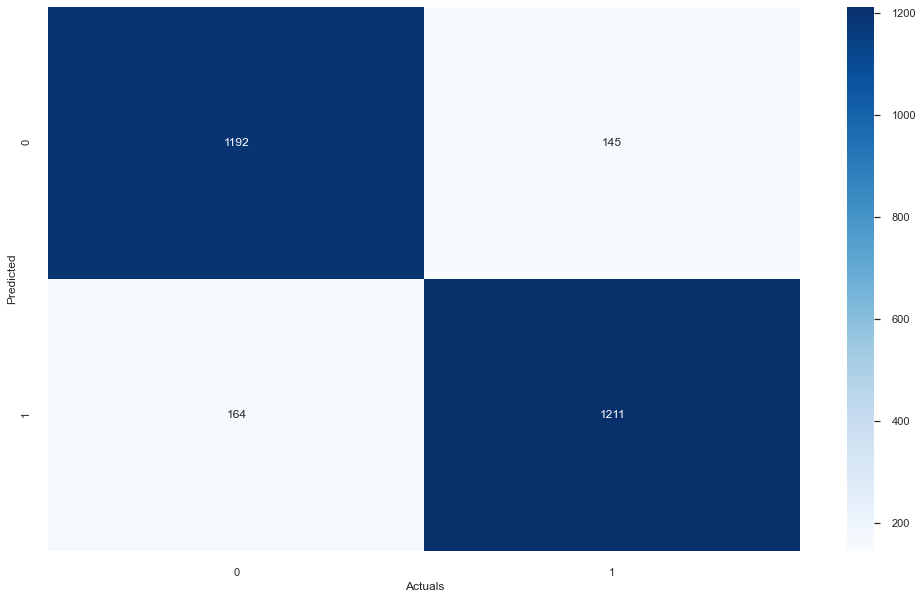

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Classification Report for Logistic Regression on training data

In [90]:
print(classification_report(Y_train, Y_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.889     0.877     0.883      3164
           1      0.879     0.891     0.885      3164

    accuracy                          0.884      6328
   macro avg      0.884     0.884     0.884      6328
weighted avg      0.884     0.884     0.884      6328



### Classification Report for Logistic Regression on test data

In [91]:
print(classification_report(Y_test, Y_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.892     0.879     0.885      1356
           1      0.881     0.893     0.887      1356

    accuracy                          0.886      2712
   macro avg      0.886     0.886     0.886      2712
weighted avg      0.886     0.886     0.886      2712



### No overfitting seen here yet!

### Applying Randomized Search CV on Logistic Regression

In [93]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [94]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [95]:
## Instantiating the LR model

model_LR2 = LogisticRegression(random_state = 42)

In [96]:
search = RandomizedSearchCV(model_LR2, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

In [97]:
# execute search   

warnings.filterwarnings('ignore')
result = search.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The sc

In [98]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8925414457786186
Best Hyperparameters: {'C': 0.3249574921216647, 'penalty': 'l1', 'solver': 'liblinear'}


### Creating the Logistic Regression Model with the best Hyperparameters from Random Search CV.

In [101]:
model_LR3 = LogisticRegression(random_state = 42,C = 0.3249574921216647, penalty = 'l1', solver =  'liblinear')

In [102]:
# Fitting the model with data
model_LR3.fit(X_train, Y_train)

LogisticRegression(C=0.3249574921216647, penalty='l1', random_state=42,
                   solver='liblinear')

In [103]:
# predict the train and test response 

Y_LR3_pred_train = model_LR3.predict(X_train)
Y_LR3_pred_test = model_LR3.predict(X_test)

In [104]:
# evaluate train and test accuracy of best hyperparms of LR

print(accuracy_score(Y_train, Y_LR3_pred_train))
print(accuracy_score(Y_test, Y_LR3_pred_test))

0.8928571428571429
0.8882743362831859


In [105]:
print(classification_report(Y_train, Y_LR3_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.898     0.886     0.892      3164
           1      0.888     0.899     0.894      3164

    accuracy                          0.893      6328
   macro avg      0.893     0.893     0.893      6328
weighted avg      0.893     0.893     0.893      6328



In [106]:
print(classification_report(Y_test, Y_LR3_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.892     0.883     0.888      1356
           1      0.885     0.893     0.889      1356

    accuracy                          0.888      2712
   macro avg      0.888     0.888     0.888      2712
weighted avg      0.888     0.888     0.888      2712



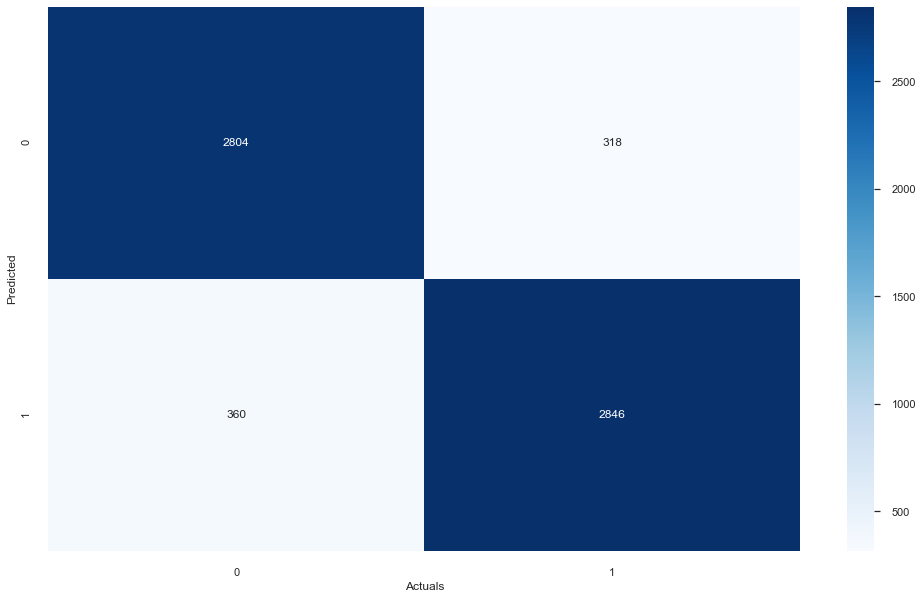

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_LR3_pred_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

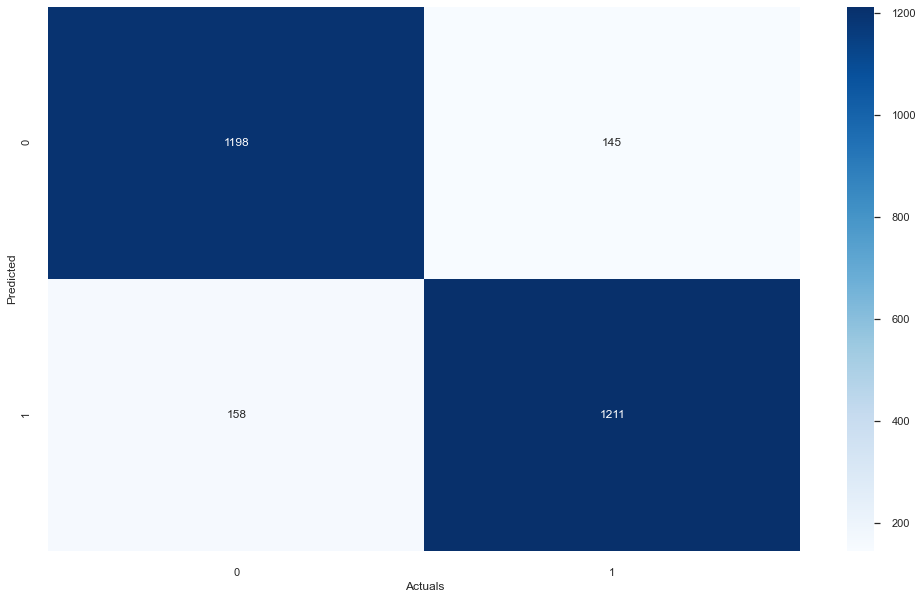

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_LR3_pred_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### AUC- ROC Curve for Tuned Logistic regression on Train data.

AUC: 0.893


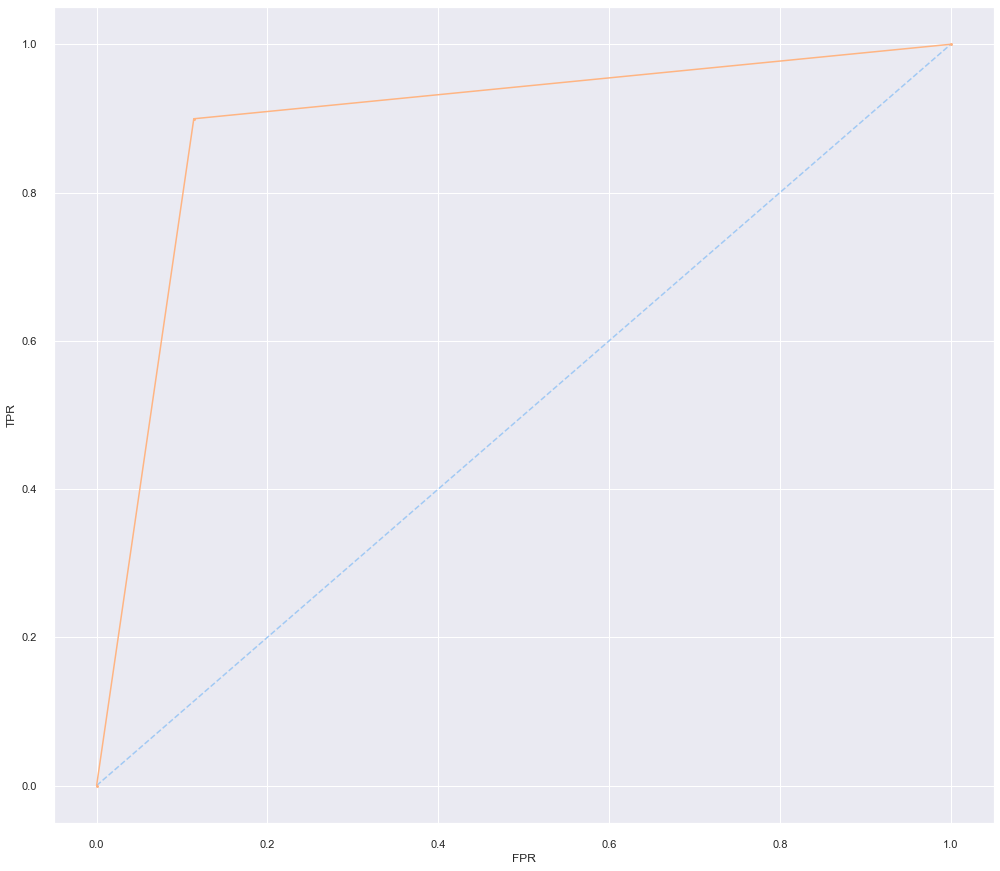

In [152]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_LR3_pred_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_LR3_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Tuned Logistic regression on Test data.

AUC: 0.888


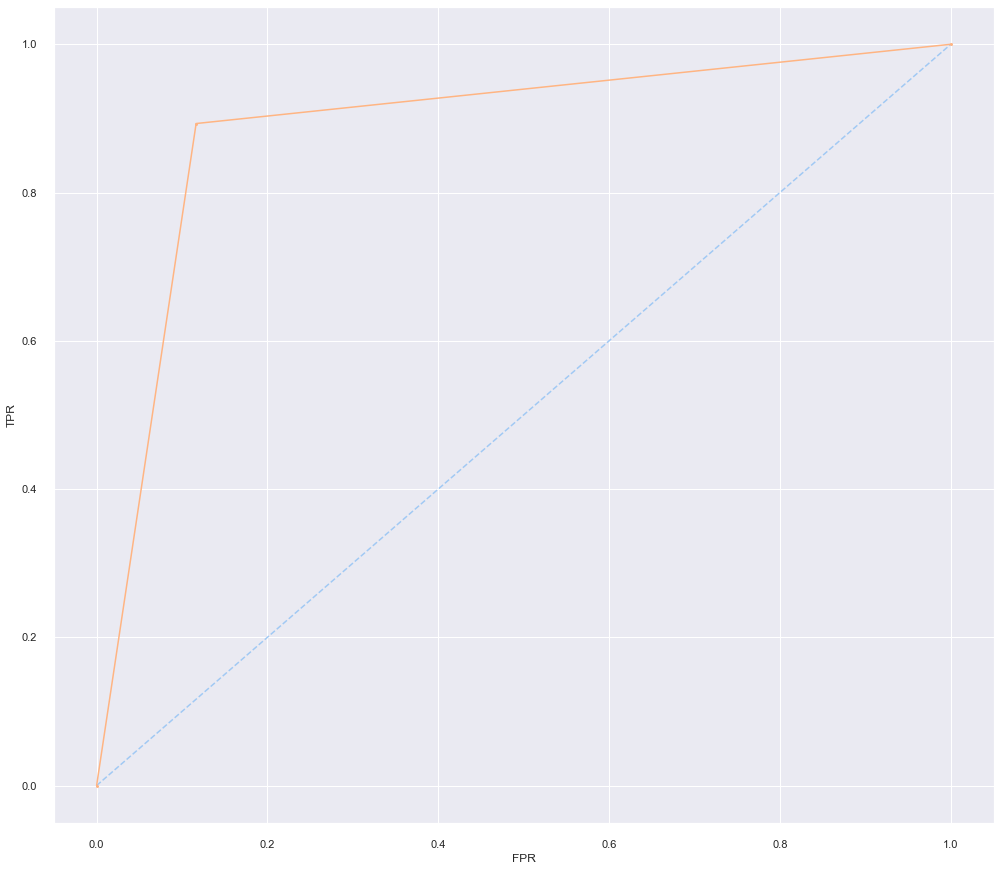

In [153]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_LR3_pred_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_LR3_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### No overfitting seen here yet!

===================================================================================================================================================================================

### Gaussian Navie Bayes Classifier

In [97]:
clf = GaussianNB()
clf.fit(X_train, Y_train.ravel())

GaussianNB()

#### Now GaussianNB classifier is built. The classifier is trained using training data and testing data. We can use fit() method for training it. 
#### After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

### Accuracy of our Gaussian Naive Bayes model

#### Performance of our model with training data

In [98]:
Y_pred_Naive_train = clf.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, Y_pred_Naive_train)))
print()

Model Accuracy: 0.8832



#### Performance of our model with testing data

In [99]:
Y_pred_Naive_test = clf.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, Y_pred_Naive_test)))
print()

Model Accuracy: 0.8875



### Confusion Matrix of Gaussian Naive Bayes Model on TEST Data

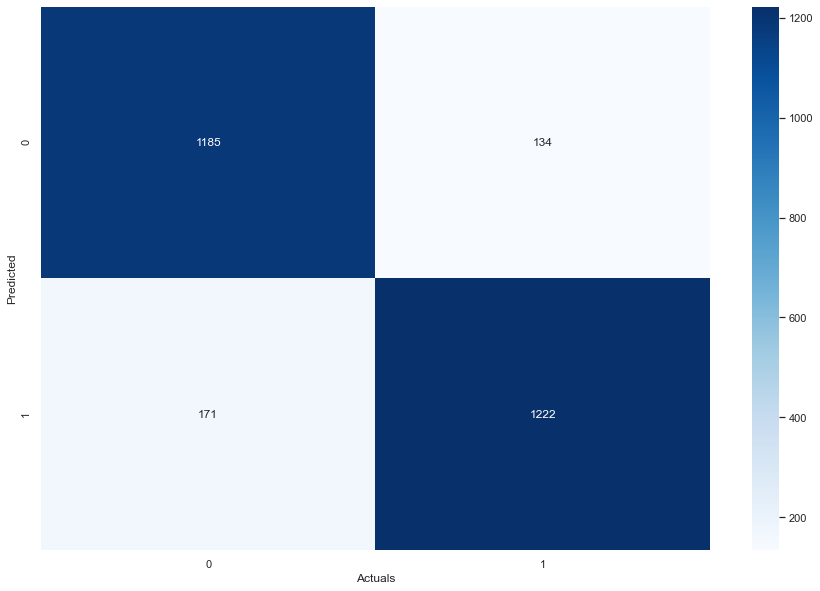

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_Naive_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Confusion Matrix of Gaussian Naive Bayes Model on TRAIN Data

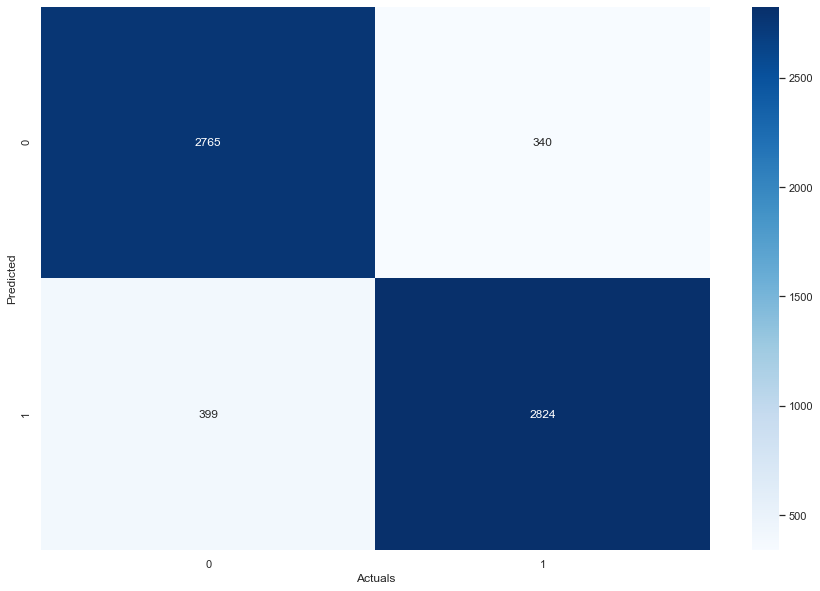

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_Naive_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Classification Report for Gaussian Naive Bayes on training data

In [102]:
print(classification_report(Y_train, Y_pred_Naive_train,digits=3))

              precision    recall  f1-score   support

           0      0.890     0.874     0.882      3164
           1      0.876     0.893     0.884      3164

    accuracy                          0.883      6328
   macro avg      0.883     0.883     0.883      6328
weighted avg      0.883     0.883     0.883      6328



### Classification Report for Gaussian Naive Bayes on testing data

In [103]:
print(classification_report(Y_test, Y_pred_Naive_test,digits=3))

              precision    recall  f1-score   support

           0      0.898     0.874     0.886      1356
           1      0.877     0.901     0.889      1356

    accuracy                          0.888      2712
   macro avg      0.888     0.888     0.888      2712
weighted avg      0.888     0.888     0.888      2712



### AUC- ROC Curve for Gaussian Naive Bayes on Train data.

AUC: 0.883


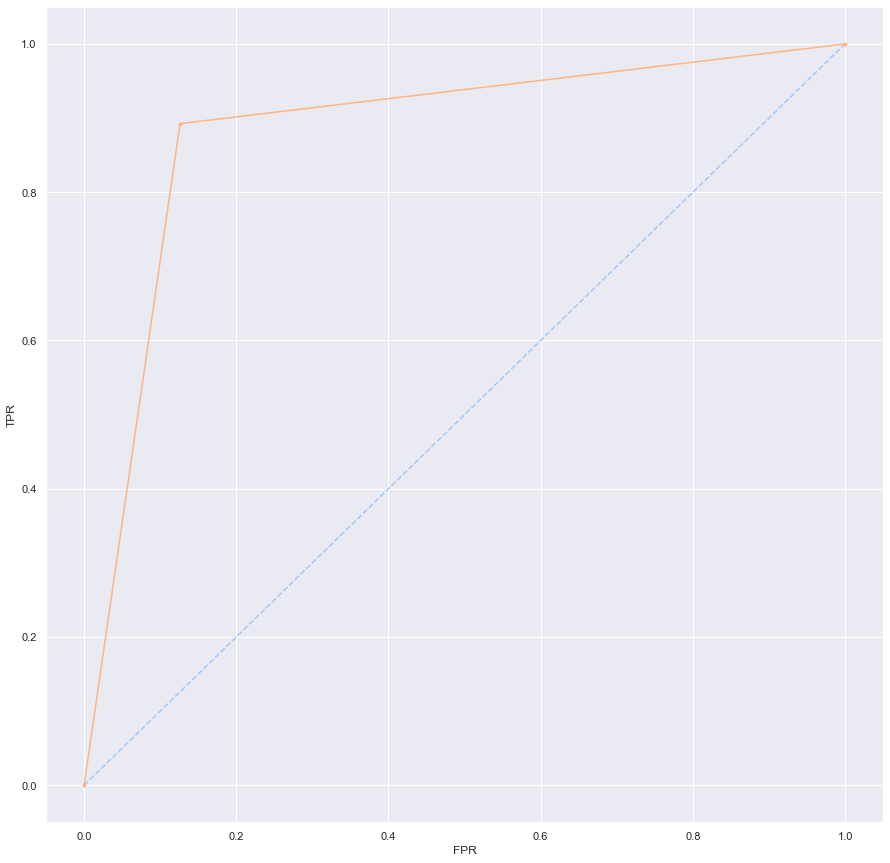

In [104]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_pred_Naive_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_Naive_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Gaussian Naive Bayes on Test data.

AUC: 0.888


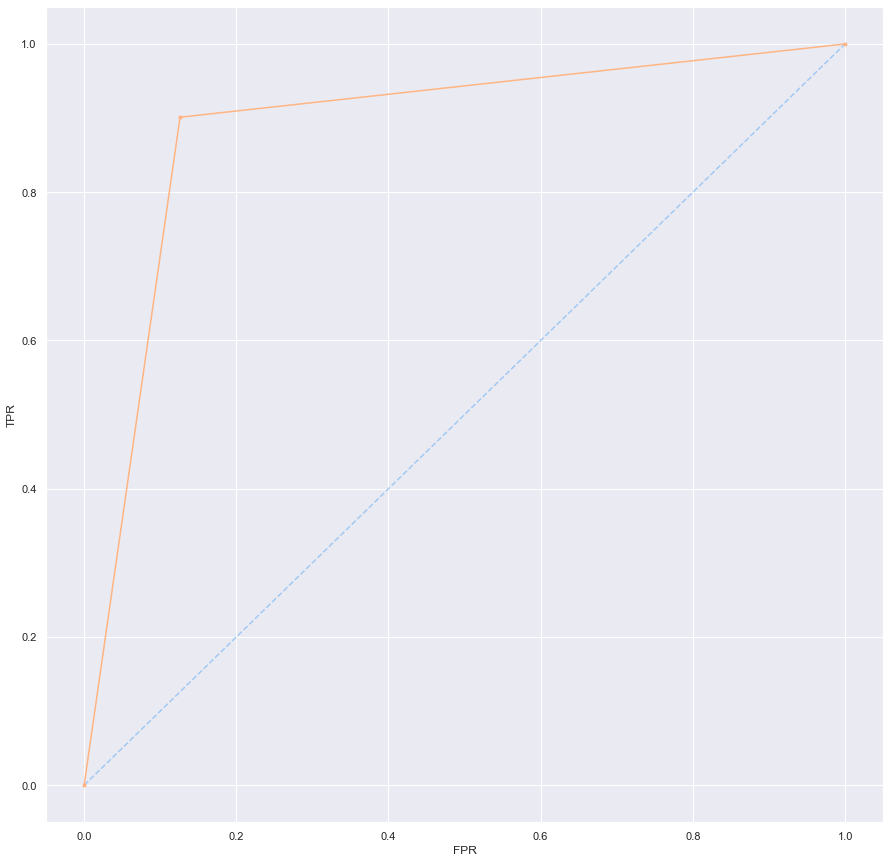

In [105]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred_Naive_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_Naive_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### No overfitting seen here yet!

==================================================================================================================================================================================

### K NN Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

### K Nearest Neighbors Classifier

### Instantiate learning model (k = 3)

In [73]:
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, Y_train)

# predict the test response
Y_pred_KNN_test = knn.predict(X_test)

In [74]:
# predict the test response
Y_pred_KNN_train = knn.predict(X_train)

In [75]:
# evaluate test accuracy
print(accuracy_score(Y_test, Y_pred_KNN_test))

0.9332595870206489


In [76]:
# evaluate train accuracy
print(accuracy_score(Y_train, Y_pred_KNN_train))

0.9584386852085968


### Confusion Matrix for Knn with k = 3 on TRAIN data

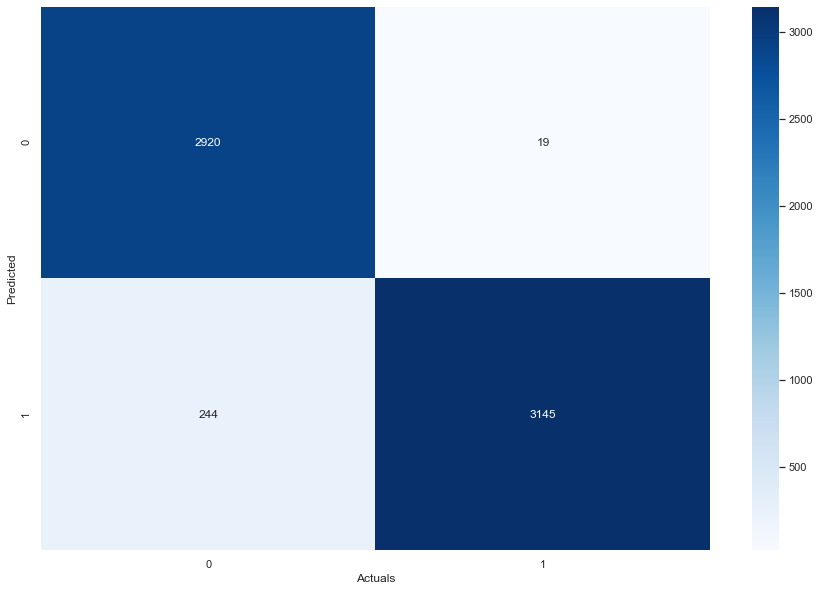

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_KNN_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Confusion Matrix for Knn with k = 3 on TEST data


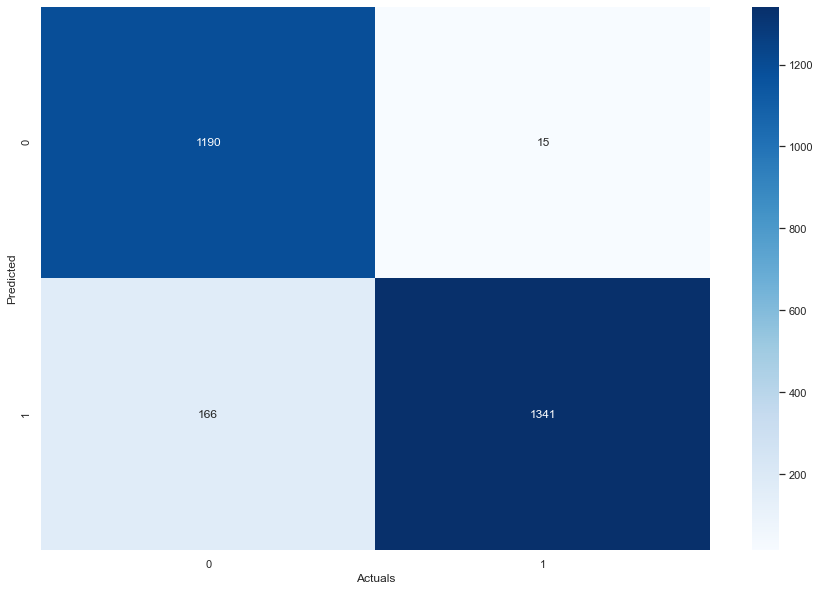

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_KNN_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Classification Report for KNN with k = 3 on training data

In [79]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_pred_KNN_train,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.923     0.957      3164
           1      0.928     0.994     0.960      3164

    accuracy                          0.958      6328
   macro avg      0.961     0.958     0.958      6328
weighted avg      0.961     0.958     0.958      6328



### Classification Report for KNN with k = 3 on test data

In [80]:
print(classification_report(Y_test, Y_pred_KNN_test,digits=3))

              precision    recall  f1-score   support

           0      0.988     0.878     0.929      1356
           1      0.890     0.989     0.937      1356

    accuracy                          0.933      2712
   macro avg      0.939     0.933     0.933      2712
weighted avg      0.939     0.933     0.933      2712



### AUC- ROC Curve for KNN K=3 on Train data.

AUC: 0.958


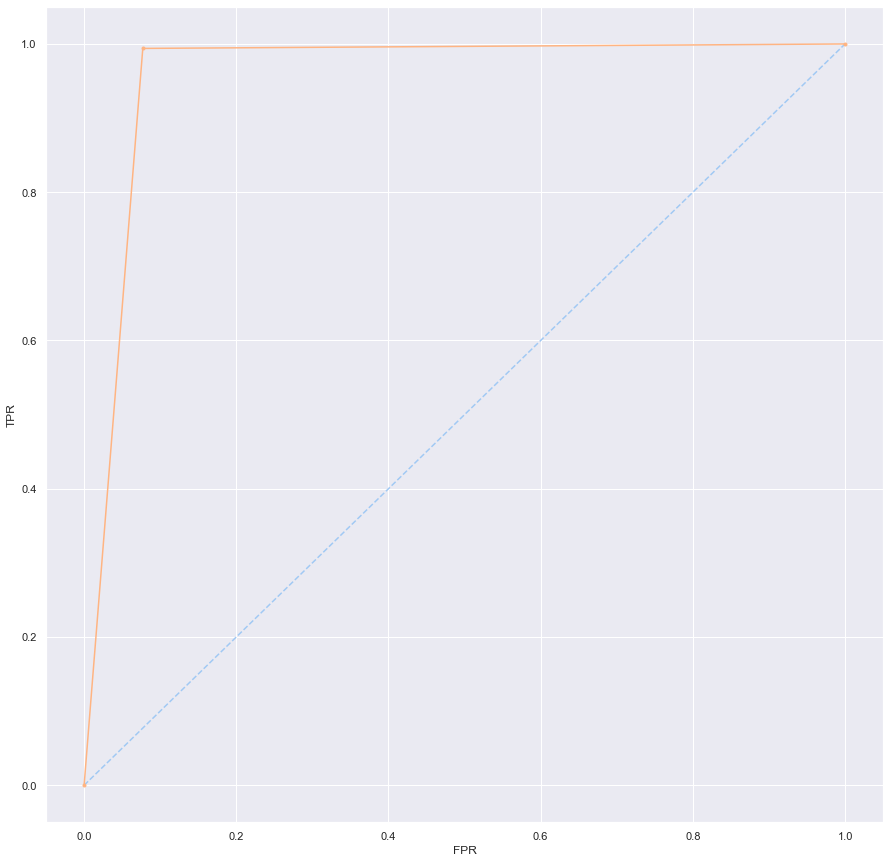

In [81]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_pred_KNN_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_KNN_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for KNN K=3 on Test data.

AUC: 0.933


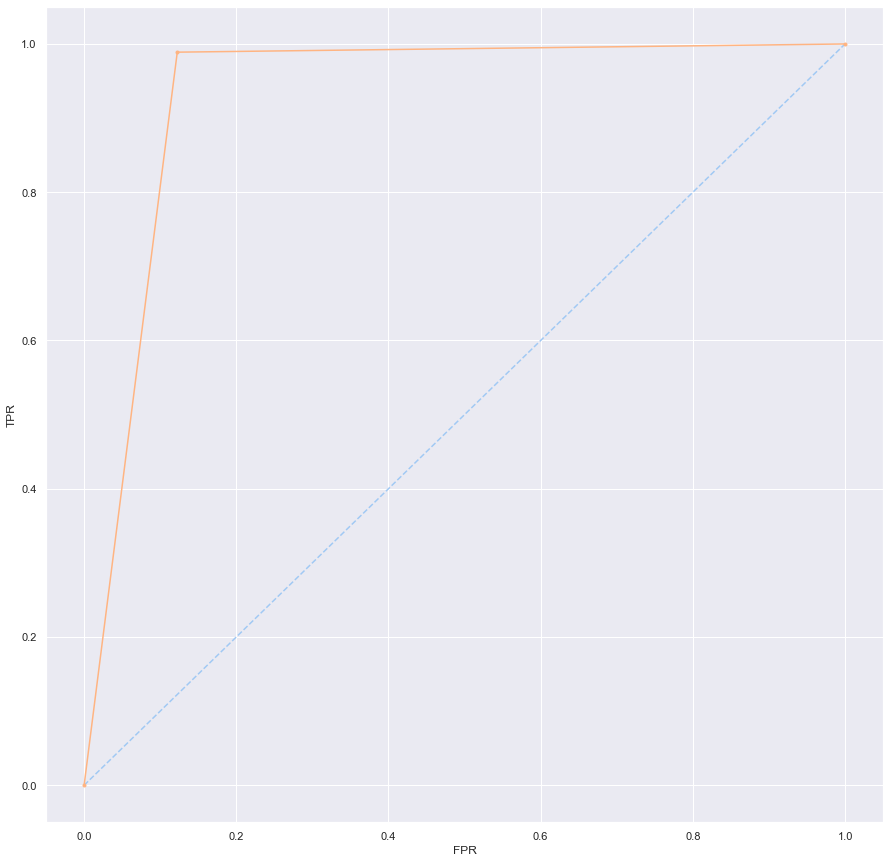

In [83]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred_KNN_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_KNN_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### No overfitting seen here yet! Best Model till now!!

### Instantiate learning model (k = 5)

In [84]:
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(X_train, Y_train)

# predict the test response
Y_pred_KNN_test = knn.predict(X_test)

In [85]:
# predict the test response
Y_pred_KNN_train = knn.predict(X_train)

In [86]:
# evaluate test accuracy
print(accuracy_score(Y_test, Y_pred_KNN_test))

0.9210914454277286


In [87]:
# evaluate train accuracy
print(accuracy_score(Y_train, Y_pred_KNN_train))

0.9394753476611883


In [88]:
from sklearn.metrics import confusion_matrix

### Confusion Matrix for Knn with k = 5 on TRAIN data

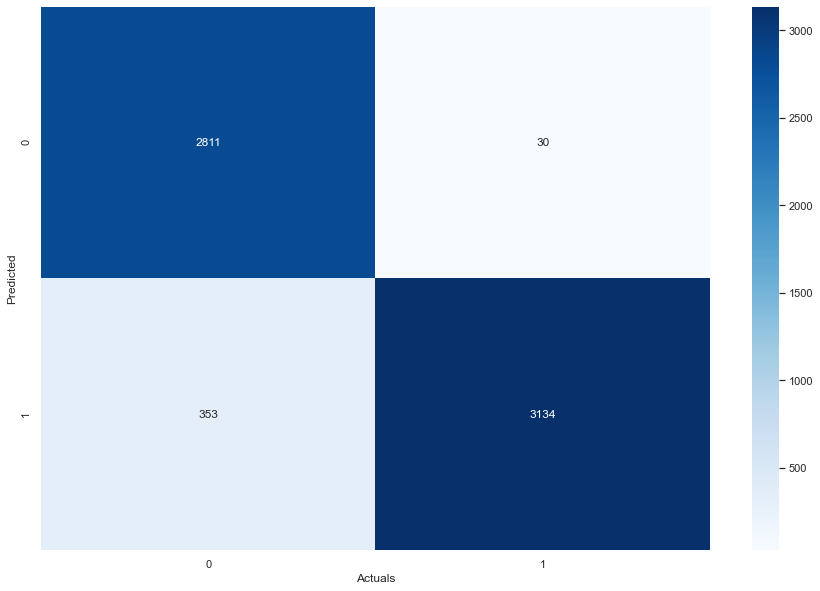

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_KNN_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Confusion Matrix for Knn with k = 5 on TEST data

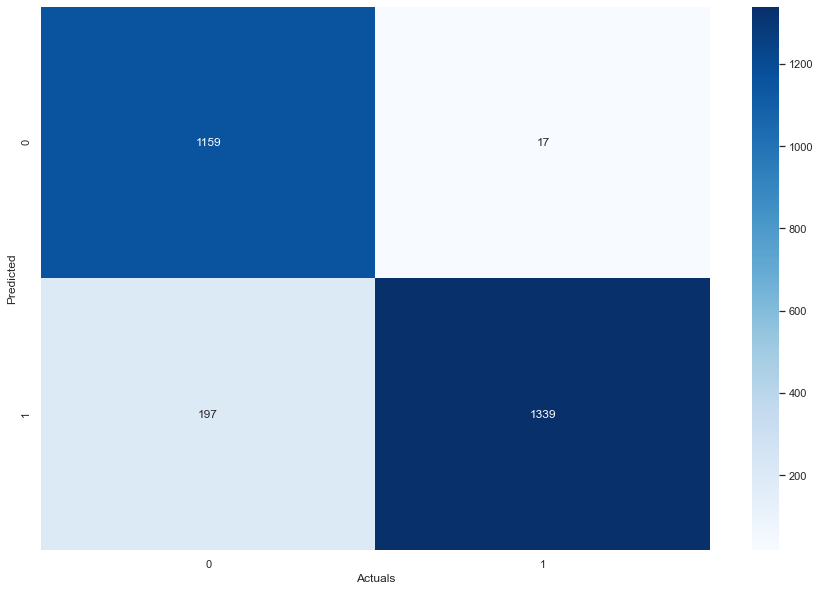

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_pred_KNN_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Classification Report

### Classification Report for KNN with k = 5 on training data

In [91]:
print(classification_report(Y_train, Y_pred_KNN_train,digits=3))

              precision    recall  f1-score   support

           0      0.989     0.888     0.936      3164
           1      0.899     0.991     0.942      3164

    accuracy                          0.939      6328
   macro avg      0.944     0.939     0.939      6328
weighted avg      0.944     0.939     0.939      6328



### Classification Report for KNN with k = 5 on test data

In [92]:
print(classification_report(Y_test, Y_pred_KNN_test,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.855     0.915      1356
           1      0.872     0.987     0.926      1356

    accuracy                          0.921      2712
   macro avg      0.929     0.921     0.921      2712
weighted avg      0.929     0.921     0.921      2712



### AUC- ROC Curve for KNN K=5 on Test data.

AUC: 0.921


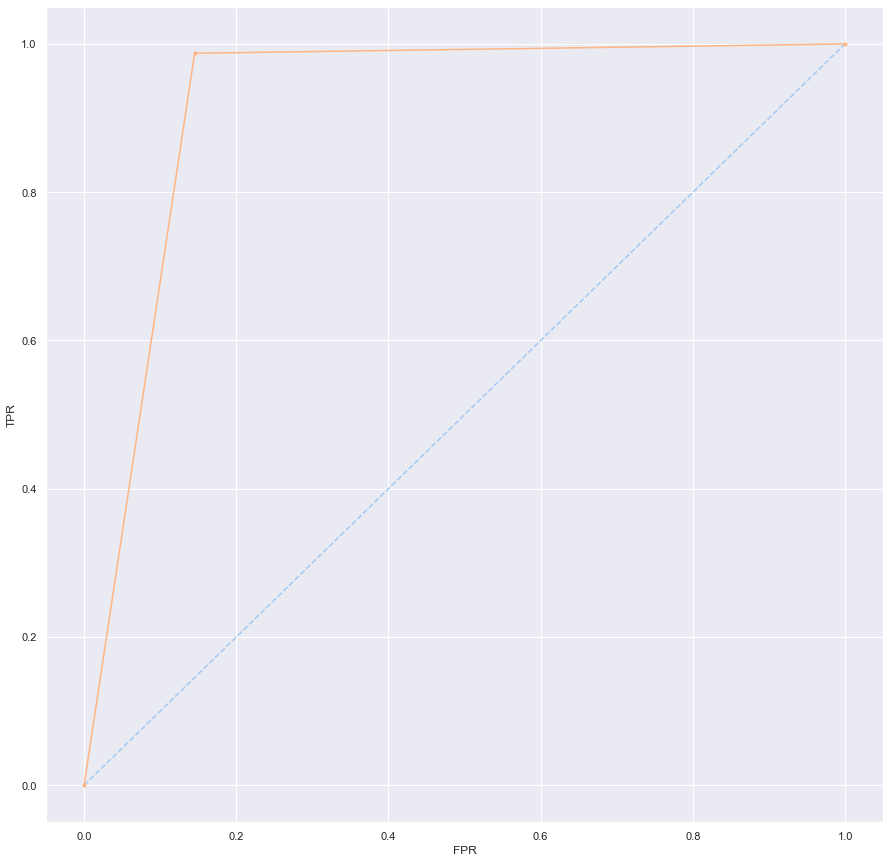

In [94]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred_KNN_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_KNN_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for KNN K=5 on Train data.

AUC: 0.939


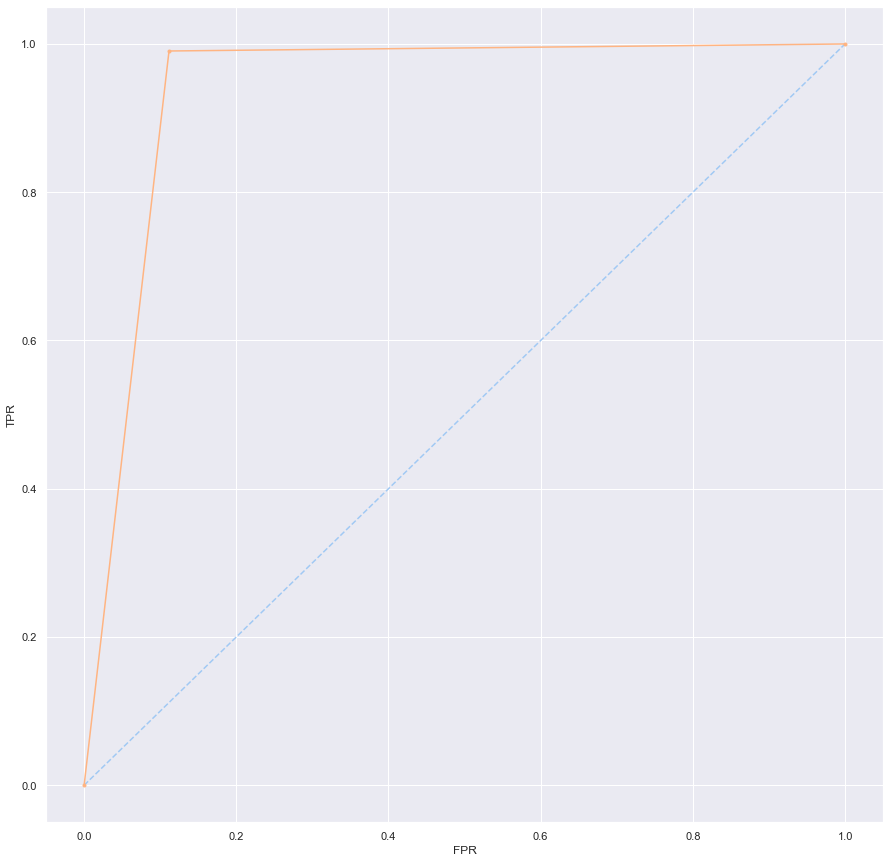

In [95]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_pred_KNN_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_KNN_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### No overfitting seen here yet!

### Automate the task of finding best values of K for KNN.

In [134]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [135]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    Y_pred_auto = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, Y_pred_auto)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


### Plot misclassification error vs k (with k value on X-axis) using matplotlib.

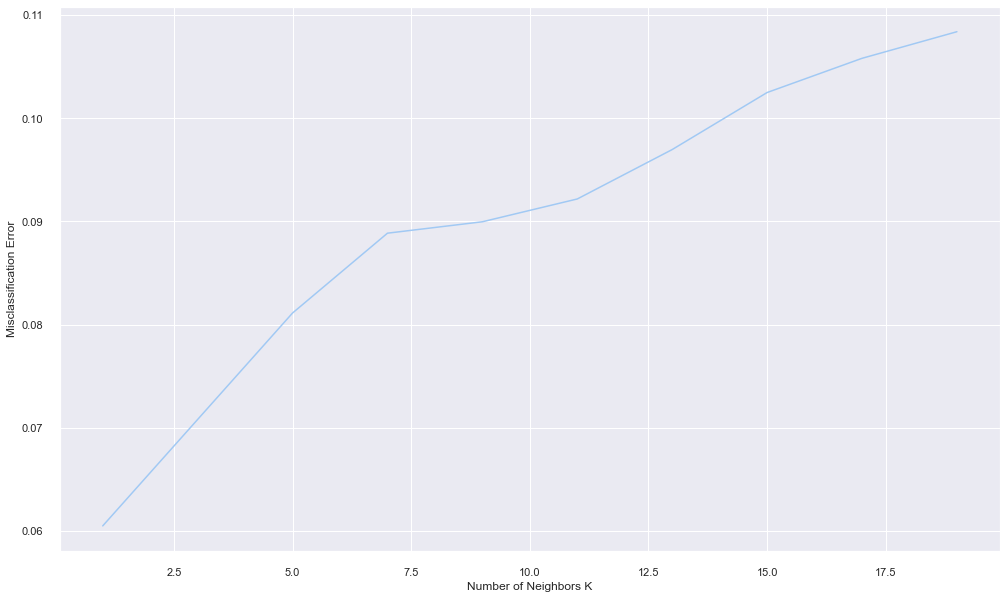

In [136]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Since the Misclassification Error is minimum at k = 1, we will stick with k = 3 

===================================================================================================================================================================================

# Support Vector Machine Algorithm.

In [61]:
from sklearn.svm import SVC

In [62]:
SVM=SVC()
SVM.fit(X_train,Y_train)

SVC()

In [63]:
# predict the train and test response
Y_svc_pred_train = SVM.predict(X_train)
Y_svc_pred_test = SVM.predict(X_test)

In [64]:
# evaluate train and test accuracy
print(accuracy_score(Y_train, Y_svc_pred_train))
print(accuracy_score(Y_test, Y_svc_pred_test))

0.8770543615676359
0.8775811209439528


### No overfitting seen here yet!

### Confusion Matrix for Support Vector Machine on TRAIN data

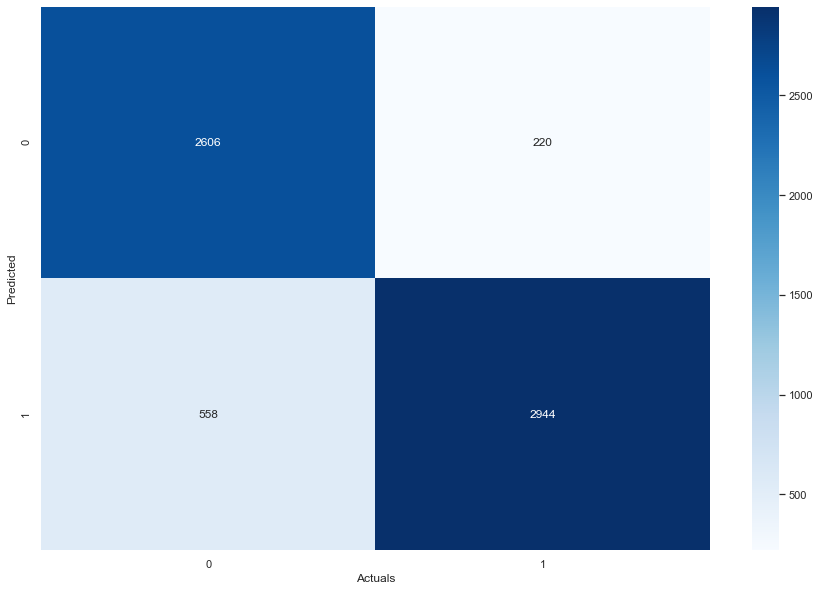

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_svc_pred_train,Y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Confusion Matrix for Support Vector Machine on TEST data

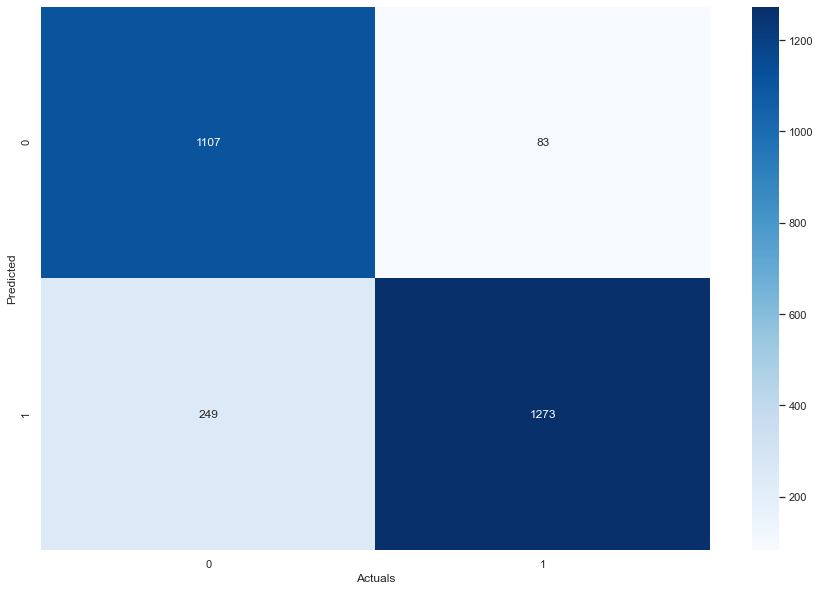

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(Y_svc_pred_test,Y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

### Classification Report for Support Vector Machine on training data

In [67]:
print(classification_report(Y_train, Y_svc_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.922     0.824     0.870      3164
           1      0.841     0.930     0.883      3164

    accuracy                          0.877      6328
   macro avg      0.881     0.877     0.877      6328
weighted avg      0.881     0.877     0.877      6328



### Classification Report for Support Vector Machine on test data

In [68]:
print(classification_report(Y_test, Y_svc_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.930     0.816     0.870      1356
           1      0.836     0.939     0.885      1356

    accuracy                          0.878      2712
   macro avg      0.883     0.878     0.877      2712
weighted avg      0.883     0.878     0.877      2712



## AUC ROC Curve for SVM on Train data.

AUC: 0.877


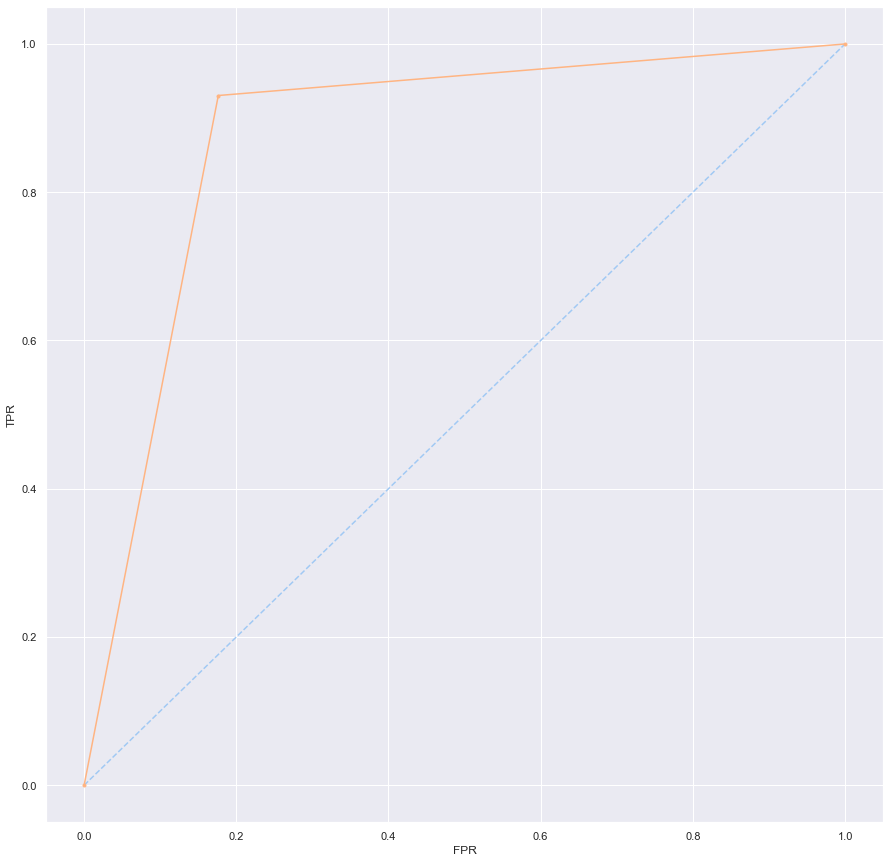

In [69]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_svc_pred_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_svc_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

## AUC ROC Curve for SVM on Test data.

AUC: 0.878


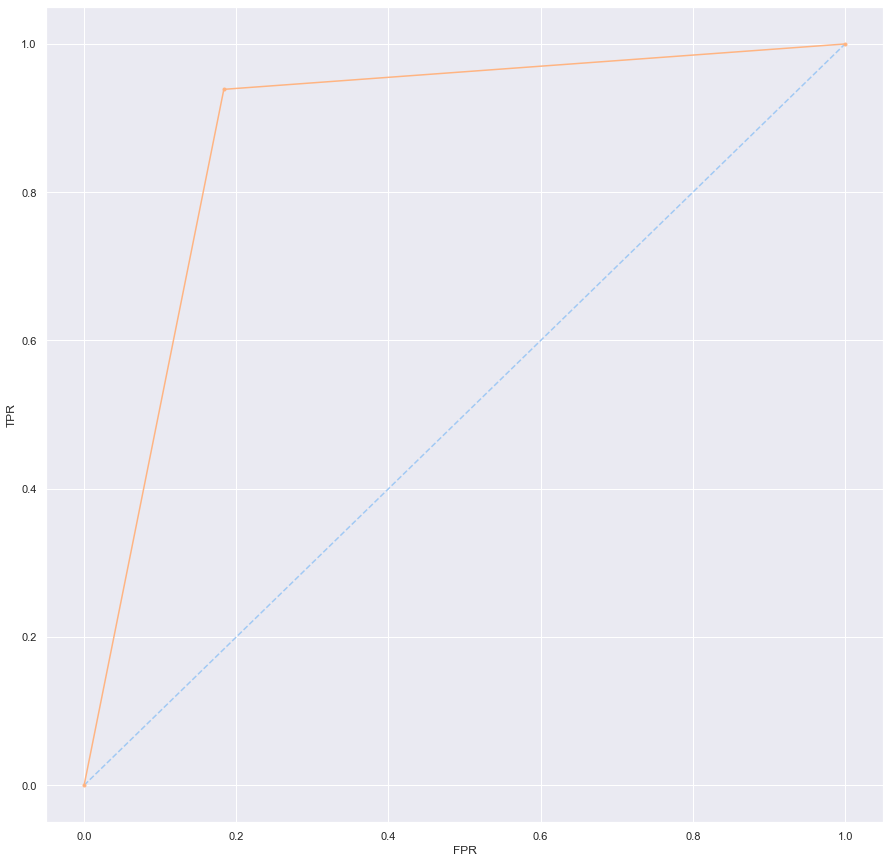

In [70]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_svc_pred_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_svc_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

======================================================================================================================================================================================

## 6. Conclusion

### The final model selected for this banking problem statement is KNN model with k=3. The reason is that 

### * This model gives a much better accuracy here as compared to the vanilla sklearn Logistic regression fitted, although it had almost a perfect fit. 
### * This model gives a much better accuracy here as compared to the Gausian Naive Bayes model fitted, although it had almost a perfect fit.
### * This model gives a slightly better accuracy here as compared the KNN model with k=5. Although this model was also one of the best with almost a near perfect fit.
### * The LR model with hyper paramters also has generalized well (Minimum difference between train and test accuracies).
### * The tuned Support Vector machine has also performed very well with almost no difference between train and test accuracies.

### Suggestions and Improvements

#### * Mortgage given by the bank should be improved. 
#### * Monthy Average Spend by the customers should be stabilized.
#### * Highest Spend by the customers should be stabilized.
#### * There are many customers who have been loyal to the bank since a very long time. Bank should target those customers as examples for the campaign.
#### * Credit Card used by customers should increase.
#### * Fixed Deposit Accounts opened for customers should increase.
#### * Security Assets of the customers with the bank should increase.